<a href="https://colab.research.google.com/github/kellyortiz/previsao-doacao-sangue-svm/blob/main/previsao_doacao_sangue_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving doacao.csv to doacao (8).csv
Matriz de Confusão:
[[10  8]
 [11  7]]
Acurácia: 47.22%

Previsões para novos doadores:
[0 1 1 1]


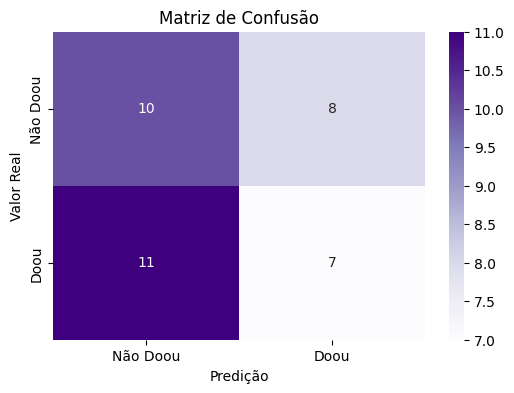

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Faça upload do arquivo CSV
uploaded = files.upload()

# Carregar o arquivo CSV com os novos doadores
novos_dadores = pd.read_csv("doacao.csv")

# Renomear as colunas para que correspondam aos nomes utilizados no treinamento
novos_dadores = novos_dadores.rename(columns={
    "Recência": "Recencia",
    "Frequência": "Frequencia"
})

# Dados fictícios para treinamento
num_samples = 356
recencia = np.random.randint(1, 30, num_samples)
frequencia = np.random.randint(1, 10, num_samples)
quantidade = frequencia * 500
tempo = np.random.randint(12, 120, num_samples)
doou = np.array([1] * 178 + [0] * 178)

dados = pd.DataFrame({"Recencia": recencia, "Frequencia": frequencia, "Quantidade": quantidade, "Tempo": tempo, "Doou": doou})

X = dados[["Recencia", "Frequencia", "Quantidade", "Tempo"]]
Y = dados["Doou"]

# Dividir os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
matriz_confusao = confusion_matrix(Y_test, Y_pred)
acuracia = accuracy_score(Y_test, Y_pred)

novos_dadores_padronizados = scaler.transform(novos_dadores[["Recencia", "Frequencia", "Quantidade", "Tempo"]])
predicoes = svm.predict(novos_dadores_padronizados)

# Matriz de confusão e acurácia
print("Matriz de Confusão:")
print(matriz_confusao)
print(f"Acurácia: {acuracia * 100:.2f}%")

print("\nPrevisões para novos doadores:")
print(predicoes)  # 1 significa que doaram, 0 significa que não doaram

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Purples", xticklabels=["Não Doou", "Doou"], yticklabels=["Não Doou", "Doou"])
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.show()